In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"   #(xxxx is your specific GPU ID)

In [2]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import Activation, Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from MyEarlyStopping import MyEarlyStopping
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# from keras.optimizers import adam
from sklearn.metrics.pairwise import cosine_similarity
import timeit
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.preprocessing import LabelEncoder  
from sklearn.metrics import average_precision_score, precision_recall_curve

# load trained model

In [3]:
resnet_model = tf.keras.models.load_model('resnet_model_0613_digit_refine_group_5-_30_final_free&unfree_40par.h5')

In [4]:
Embedding_model = tf.keras.models.Model(inputs=resnet_model.input,
                                 outputs=resnet_model.get_layer("flatten_1").output)

## load data

In [5]:
All_data = ImageDataGenerator(preprocessing_function=preprocess_input)
All_data_generator = All_data.flow_from_directory('/data/home/cou/yuli5/Audio/online_data_adaption/Mel_Audio_folder_digits',
                                                batch_size=1,
                                                target_size=(224,224),
                                                class_mode='categorical',
                                               shuffle=False)

Found 30000 images belonging to 10 classes.


In [6]:
image_names = All_data_generator.filenames
image_no = [i.split("/")[1].split("_")[2].split(".")[0] for i in image_names]
image_no = np.array(list(map(int, image_no)))
ALL_participant_class = [i.split("/")[1].split("_")[1] for i in image_names]
ALL_participant_class = np.array(list(map(int, ALL_participant_class)))
command_class = All_data_generator.classes
All_participant_class = tf.keras.utils.to_categorical(ALL_participant_class-1, num_classes=60)
All_command_class = tf.keras.utils.to_categorical(command_class, num_classes=10)
All_command_uniform = All_command_class*0+1/10

In [7]:
All_Inputs = [next(All_data_generator)[0][0] for _ in range(len(All_data_generator))]
All_Inputs = np.array(All_Inputs)

In [8]:
# image_no<=20 means every word repeat 20 times 
s1_number = 5 # ALL_participant_class  the subject index
s2_number = 30 # ALL_participant_class  the subject index
select_indexs_train = (image_no<=19)&(ALL_participant_class<=s2_number)
Train_Inputs = All_Inputs[select_indexs_train]
Train_participant_class = All_participant_class[select_indexs_train][:,0:s2_number]
Train_participants = np.argmax(Train_participant_class, axis=1) +1
Train_participant_uniform = Train_participant_class*0+1/s2_number
Train_command_class = All_command_class[select_indexs_train]
Train_command_uniform = Train_command_class*0+1/10

In [9]:
select_indexs_test = (image_no>39)&(image_no<=49)&(ALL_participant_class<=s2_number)
Test_Inputs = All_Inputs[select_indexs_test]
Test_participant_class = All_participant_class[select_indexs_test][:,0:s2_number]
Test_participants = np.argmax(Test_participant_class, axis=1) +1
Test_participant_uniform = Test_participant_class*0+1/s2_number
Test_command_class = All_command_class[select_indexs_test]
Test_command_uniform = Test_command_class*0+1/10

In [10]:
# external 51-60
select_indexs_External = (image_no>39)&(image_no<=49)&(ALL_participant_class>=51)
External_Inputs = All_Inputs[select_indexs_External]
External_participants = np.argmax(All_participant_class[select_indexs_External], axis=1) +1

# get average embedding value based on training data

In [11]:
# average all training subject embedding
embd_sub_1 = Embedding_model.predict(Train_Inputs[Train_participants==1]).mean(axis=0).reshape(1, -1)
embd_sub_2 = Embedding_model.predict(Train_Inputs[Train_participants==2]).mean(axis=0).reshape(1, -1)
embd_sub_3 = Embedding_model.predict(Train_Inputs[Train_participants==3]).mean(axis=0).reshape(1, -1)
embd_sub_4 = Embedding_model.predict(Train_Inputs[Train_participants==4]).mean(axis=0).reshape(1, -1)
embd_sub_5 = Embedding_model.predict(Train_Inputs[Train_participants==5]).mean(axis=0).reshape(1, -1)
embd_sub_6 = Embedding_model.predict(Train_Inputs[Train_participants==6]).mean(axis=0).reshape(1, -1)
embd_sub_7 = Embedding_model.predict(Train_Inputs[Train_participants==7]).mean(axis=0).reshape(1, -1)
embd_sub_8 = Embedding_model.predict(Train_Inputs[Train_participants==8]).mean(axis=0).reshape(1, -1)
embd_sub_9 = Embedding_model.predict(Train_Inputs[Train_participants==9]).mean(axis=0).reshape(1, -1)
embd_sub_10 = Embedding_model.predict(Train_Inputs[Train_participants==10]).mean(axis=0).reshape(1, -1)
embd_sub_11 = Embedding_model.predict(Train_Inputs[Train_participants==11]).mean(axis=0).reshape(1, -1)
embd_sub_12 = Embedding_model.predict(Train_Inputs[Train_participants==12]).mean(axis=0).reshape(1, -1)
embd_sub_13 = Embedding_model.predict(Train_Inputs[Train_participants==13]).mean(axis=0).reshape(1, -1)
embd_sub_14 = Embedding_model.predict(Train_Inputs[Train_participants==14]).mean(axis=0).reshape(1, -1)
embd_sub_15 = Embedding_model.predict(Train_Inputs[Train_participants==15]).mean(axis=0).reshape(1, -1)
embd_sub_16 = Embedding_model.predict(Train_Inputs[Train_participants==16]).mean(axis=0).reshape(1, -1)
embd_sub_17 = Embedding_model.predict(Train_Inputs[Train_participants==17]).mean(axis=0).reshape(1, -1)
embd_sub_18 = Embedding_model.predict(Train_Inputs[Train_participants==18]).mean(axis=0).reshape(1, -1)
embd_sub_19 = Embedding_model.predict(Train_Inputs[Train_participants==19]).mean(axis=0).reshape(1, -1)
embd_sub_20 = Embedding_model.predict(Train_Inputs[Train_participants==20]).mean(axis=0).reshape(1, -1)
embd_sub_21 = Embedding_model.predict(Train_Inputs[Train_participants==21]).mean(axis=0).reshape(1, -1)
embd_sub_22 = Embedding_model.predict(Train_Inputs[Train_participants==22]).mean(axis=0).reshape(1, -1)
embd_sub_23 = Embedding_model.predict(Train_Inputs[Train_participants==23]).mean(axis=0).reshape(1, -1)
embd_sub_24 = Embedding_model.predict(Train_Inputs[Train_participants==24]).mean(axis=0).reshape(1, -1)
embd_sub_25 = Embedding_model.predict(Train_Inputs[Train_participants==25]).mean(axis=0).reshape(1, -1)
embd_sub_26 = Embedding_model.predict(Train_Inputs[Train_participants==26]).mean(axis=0).reshape(1, -1)
embd_sub_27 = Embedding_model.predict(Train_Inputs[Train_participants==27]).mean(axis=0).reshape(1, -1)
embd_sub_28 = Embedding_model.predict(Train_Inputs[Train_participants==28]).mean(axis=0).reshape(1, -1)
embd_sub_29 = Embedding_model.predict(Train_Inputs[Train_participants==29]).mean(axis=0).reshape(1, -1)
embd_sub_30 = Embedding_model.predict(Train_Inputs[Train_participants==30]).mean(axis=0).reshape(1, -1)
embd_allsubs = Embedding_model.predict(Train_Inputs).mean(axis=0).reshape(1, -1)

# end-to-end speaker verification 

## calculation 

In [30]:
CosSimty = pd.DataFrame(columns=["Real_sub"])

In [31]:
for i in range(1,31):
    test_Data = Test_Inputs[np.where(Test_participants == i)]
    temp = pd.DataFrame(columns=["Real_sub"])
    temp["Real_sub"] = [i]*len( test_Data )
    temp["cos_sub_1"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_1)
    temp["cos_sub_2"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_2)
    temp["cos_sub_3"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_3)
    temp["cos_sub_4"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_4)
    temp["cos_sub_5"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_5)
    temp["cos_sub_6"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_6)
    temp["cos_sub_7"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_7)
    temp["cos_sub_8"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_8)
    temp["cos_sub_9"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_9)
    temp["cos_sub_10"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_10)
    temp["cos_sub_11"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_11)
    temp["cos_sub_12"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_12)
    temp["cos_sub_13"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_13)
    temp["cos_sub_14"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_14)
    temp["cos_sub_15"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_15)
    temp["cos_sub_16"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_16)
    temp["cos_sub_17"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_17)
    temp["cos_sub_18"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_18)
    temp["cos_sub_19"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_19)
    temp["cos_sub_20"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_20)
    temp["cos_sub_21"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_21)
    temp["cos_sub_22"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_22)
    temp["cos_sub_23"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_23)
    temp["cos_sub_24"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_24)
    temp["cos_sub_25"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_25)
    temp["cos_sub_26"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_26)
    temp["cos_sub_27"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_27)
    temp["cos_sub_28"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_28)
    temp["cos_sub_29"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_29)
    temp["cos_sub_30"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_30)
    temp["cos_all"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_allsubs)

    CosSimty = CosSimty.append(temp,ignore_index=True)

for i in range(51,61):
    test_Data = External_Inputs[np.where(External_participants == i)]
    temp = pd.DataFrame(columns=["Real_sub"])
    temp["Real_sub"] = [i]*len( test_Data )
    temp["cos_sub_1"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_1)
    temp["cos_sub_2"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_2)
    temp["cos_sub_3"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_3)
    temp["cos_sub_4"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_4)
    temp["cos_sub_5"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_5)
    temp["cos_sub_6"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_6)
    temp["cos_sub_7"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_7)
    temp["cos_sub_8"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_8)
    temp["cos_sub_9"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_9)
    temp["cos_sub_10"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_10)
    temp["cos_sub_11"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_11)
    temp["cos_sub_12"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_12)
    temp["cos_sub_13"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_13)
    temp["cos_sub_14"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_14)
    temp["cos_sub_15"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_15)
    temp["cos_sub_16"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_16)
    temp["cos_sub_17"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_17)
    temp["cos_sub_18"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_18)
    temp["cos_sub_19"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_19)
    temp["cos_sub_20"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_20)
    temp["cos_sub_21"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_21)
    temp["cos_sub_22"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_22)
    temp["cos_sub_23"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_23)
    temp["cos_sub_24"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_24)
    temp["cos_sub_25"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_25)
    temp["cos_sub_26"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_26)
    temp["cos_sub_27"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_27)
    temp["cos_sub_28"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_28)
    temp["cos_sub_29"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_29)
    temp["cos_sub_30"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_sub_30)
    temp["cos_all"]= cosine_similarity(Embedding_model.predict( test_Data ).reshape(len( test_Data ), -1), embd_allsubs)

    CosSimty = CosSimty.append(temp,ignore_index=True)


In [32]:
CosSimty

,Real_sub,cos_sub_1,cos_sub_2,cos_sub_3,cos_sub_4,cos_sub_5,cos_sub_6,cos_sub_7,cos_sub_8,cos_sub_9,...,cos_sub_22,cos_sub_23,cos_sub_24,cos_sub_25,cos_sub_26,cos_sub_27,cos_sub_28,cos_sub_29,cos_sub_30,cos_all
0,1,0.924593,0.058073,0.018954,0.018033,0.017385,0.045445,0.020948,0.044593,0.124525,...,0.028959,0.013684,0.044506,0.064312,0.036828,0.052225,0.038066,0.065794,0.031315,0.220007
1,1,0.909637,0.054489,0.025653,0.034752,0.019815,0.060966,0.048514,0.028051,0.139936,...,0.026467,0.014471,0.066905,0.117888,0.073474,0.084121,0.043157,0.068400,0.046739,0.240878
2,1,0.969093,0.020057,0.012644,0.013052,0.010867,0.034595,0.014876,0.014997,0.132319,...,0.012821,0.006875,0.023681,0.031160,0.033928,0.043381,0.032069,0.048828,0.027658,0.185983
3,1,0.870389,0.029287,0.027887,0.029462,0.020878,0.079293,0.051175,0.041295,0.179984,...,0.028594,0.015842,0.061543,0.063228,0.068551,0.083872,0.052111,0.082689,0.041947,0.237166
4,1,0.882163,0.030158,0.025726,0.045247,0.019546,0.091720,0.098355,0.036562,0.148979,...,0.025885,0.012234,0.077426,0.072917,0.063291,0.108377,0.051326,0.078715,0.044516,0.247833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,60,0.054124,0.051097,0.062129,0.102081,0.040094,0.034314,0.053970,0.044007,0.023513,...,0.148640,0.078505,0.102301,0.420442,0.451584,0.091591,0.299826,0.170465,0.145516,0.341912
3996,60,0.076663,0.046719,0.056436,0.113848,0.043524,0.048124,0.063311,0.051437,0.048430,...,0.158776,0.049397,0.133115,0.291916,0.157165,0.101296,0.078150,0.386318,0.118319,0.303250
3997,60,0.068534,0.041306,0.053828,0.125429,0.044603,0.042450,0.057223,0.043901,0.038565,...,0.122178,0.048752,0.127763,0.577732,0.148337,0.089104,0.100232,0.211082,0.156584,0.317245
3998,60,0.059117,0.047833,0.052198,0.126526,0.040717,0.034935,0.045620,0.040748,0.034749,...,0.144776,0.069350,0.122627,0.604076,0.404186,0.077909,0.209934,0.187349,0.196988,0.341580


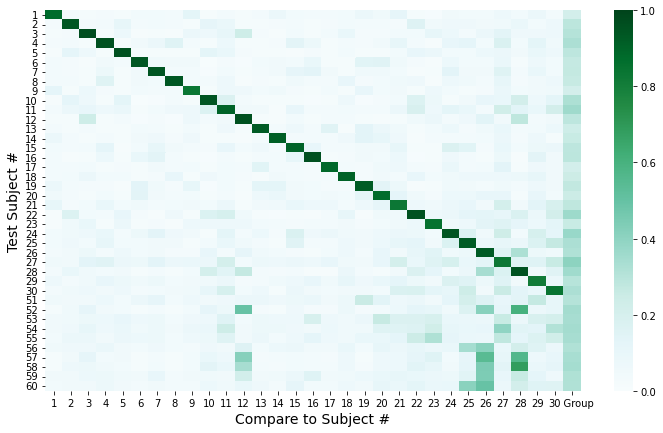

In [33]:
plt.figure(figsize=(12,7))
sns.heatmap(data=CosSimty.groupby(["Real_sub"]).mean(),cmap='BuGn',vmin=0,vmax=1)
plt.xlabel("Compare to Subject #",fontsize = 14)
plt.xticks(np.array(range(0,31))+0.5,list(range(1,31))+["    Group"],rotation=0)
plt.ylabel("Test Subject #",fontsize = 14)
plt.yticks(np.array(range(0,40))+0.5,list(range(1,31))+list(range(51,61)),rotation=0)
plt.show()